In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv(r'../data/train_tokenized.csv')
df_test = pd.read_csv(r'../data/test_tokenized.csv')

df_train

,post,gender,tokenized,cleaned,cluster
0,What? No escape? I thought that I would be ab...,1,"['escape', 'thought', 'would', 'able', 'get', ...","['escape', 'thought', 'able', 'need', 'hear', ...",7
1,"And all I can say is Thank You, Thank You!!! ...",1,"['say', 'thank', 'thank', 'think', 'look', 'an...","['thank', 'thank', 'think', 'look', 'surgical'...",7
2,She is a very very sweet girl :)\n\nIts hardly...,1,"['sweet', 'girl', 'hardly', '2', 'month', 'sin...","['sweet', 'girl', 'hardly', 'month', 'start', ...",5
3,"I love what Brooke had to say about the event,...",1,"['love', 'brooke', 'say', 'event', 'also', 'ti...","['love', 'brooke', 'event', 'tidbit', 'advice'...",2
4,I have some photos I've been meaning to post f...,1,"['photo', 'ive', 'mean', 'post', 'david', 'rei...","['photo', 'mean', 'post', 'david', 'reid', 'lo...",2
...,...,...,...,...,...
2569,"So, on my long run of the week I like to conte...",1,"['long', 'run', 'week', 'like', 'contemplate',...","['long', 'run', 'week', 'like', 'contemplate',...",7
2570,Contact lenses require a certain degree of car...,0,"['contact', 'lenses', 'require', 'certain', 'd...","['contact', 'lense', 'require', 'certain', 'de...",2
2571,I didn't start watching AD until way after the...,1,"['didnt', 'start', 'watch', 'ad', 'way', 'show...","['start', 'watch', 'way', 'late', 'know', 'beg...",2
2572,"At Creation Moments, Ian Taylor starts by aski...",0,"['creation', 'moment', 'ian', 'taylor', 'start...","['creation', 'moment', 'ian', 'taylor', 'start...",7


In [2]:
df_test

,post,gender,tokenized,cleaned,cluster
0,perfect epitome of demagogue ..jus too senitiv...,1,"['perfect', 'epitome', 'demagogue', 'jus', 'se...","['perfect', 'epitome', 'demagogue', 'ju', 'sen...",5
1,Autistic Rights are Disability Rights are Huma...,1,"['autistic', 'right', 'disability', 'right', '...","['autistic', 'right', 'disability', 'right', '...",7
2,Good news for U.S. territories; Del. Donna M. ...,1,"['good', 'news', 'u', 'territories', 'del', 'd...","['good', 'news', 'territories', 'del', 'donna'...",6
3,The weather in this part of the globe is once ...,1,"['weather', 'part', 'globe', 'change', 'slight...","['weather', 'globe', 'change', 'slight', 'chil...",2
4,I was the first one to arrive at the station. ...,1,"['first', 'one', 'arrive', 'station', 'sit', '...","['arrive', 'station', 'sit', 'bench', 'wait', ...",2
...,...,...,...,...,...
639,"Sorry, Charlie\n\nUntil recently, it was assu...",0,"['sorry', 'charlie', 'recently', 'assume', 'ch...","['sorry', 'charlie', 'recently', 'assume', 'ch...",6
640,Feel Good….!!! :) Recently i have seen a video...,0,"['feel', 'good…', 'recently', 'see', 'video', ...","['feel', 'good', 'recently', 'video', 'abt', '...",5
641,"I've been working on some new material. "" When...",0,"['ive', 'work', 'new', 'material', 'youre', 'b...","['work', 'new', 'material', 'blind', 'sen', 's...",2
642,vasoooool raani :P.. finally here goes a testi...,0,"['vasoooool', 'raani', 'p', 'finally', 'go', '...","['vasoooool', 'raani', 'finally', 'testimonial...",5


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score

### Unigrams

In [4]:
pipe1 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,1))), ('naive', MultinomialNB())])
pipe1.fit(X=df_train['tokenized'], y=df_train['gender'])

pred1 = pipe1.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred1))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred1)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred1, average='weighted')))

Accuracy = 0.6614906832298136
F1 score = 0.6585753296850652


### Unigrams + Bigrams

In [13]:
pipe2 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))), ('naive', MultinomialNB())])
pipe2.fit(X=df_train['tokenized'], y=df_train['gender'])

pred2 = pipe2.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred2))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred2)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred2, average='weighted')))

Accuracy = 0.6739130434782609
F1 score = 0.6721526282137569


### Unigrams + Bigrams + Trigrams

In [6]:
pipe3 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))), ('naive', MultinomialNB())])
pipe3.fit(X=df_train['tokenized'], y=df_train['gender'])

pred3 = pipe3.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred3))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred3)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred3, average='weighted')))

Accuracy = 0.6785714285714286
F1 score = 0.6774604225118346


Also trying 4-grams and 5-grams, but not really any major improvements

In [7]:
pipe4 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,4))), ('naive', MultinomialNB())])
pipe4.fit(X=df_train['tokenized'], y=df_train['gender'])

pred4 = pipe4.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred4))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred4)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred4, average='weighted')))

Accuracy = 0.6785714285714286
F1 score = 0.6775817870777918


In [8]:
pipe5 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,5))), ('naive', MultinomialNB())])
pipe5.fit(X=df_train['tokenized'], y=df_train['gender'])

pred5 = pipe5.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred5))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred5)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred5, average='weighted')))

Accuracy = 0.6832298136645962
F1 score = 0.6824223116687818


In [10]:
pipe6 = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,6))), ('naive', MultinomialNB())])
pipe6.fit(X=df_train['tokenized'], y=df_train['gender'])

pred6 = pipe6.predict(df_test['tokenized'])
#print(classification_report(y_true=df_test['gender'], y_pred=pred6))
print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred6)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred6, average='weighted')))

Accuracy = 0.6847826086956522
F1 score = 0.6840316472666766


## Tune Naive Bayes


In [ ]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('vectorizer', CountVectorizer()), ('naive', MultinomialNB())])

parameters = {'vectorizer__binary':[True, False], 'vectorizer__ngram_range': [(1,1), (1,2), (1,3), (1,4), (1,5)], 'naive__alpha':[0.1, 0.5, 1.0, 1.5, 2.0] }
# by default 5-fold cross validation
search = GridSearchCV(pipe, parameters)

search.fit(df_train['tokenized'], df_train['gender'])

print("Best CV score = %0.3f with the following parameters:" % search.best_score_)
print(search.best_params_)

Best CV score = 0.703 with the following parameters:
{'naive__alpha': 2.0, 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 5)}


The optimal model has

*   non-binary vectorizer (default parameter)
*   uses unigrams and bigrams 
*   naive bayes parameter alpha=1 (default parameter)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

opt_pipe = Pipeline([('vectorizer', CountVectorizer(binary=False, ngram_range=(1,5))), ('naive', MultinomialNB(alpha=2.0))])
opt_pipe.fit(df_train['tokenized'], df_train['gender'])

pred = opt_pipe.predict(df_test['tokenized'])

print(classification_report(df_test['gender'], pred))
print("Accuracy  = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred)))
print("Precision = " + str(precision_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("Recall    = " + str(recall_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))
print("F1 score  = " + str(f1_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67       335
           1       0.65      0.73      0.69       309

    accuracy                           0.68       644
   macro avg       0.68      0.68      0.68       644
weighted avg       0.69      0.68      0.68       644

Accuracy  = 0.6816770186335404
Precision = 0.6862937845945832
Recall    = 0.6816770186335404
F1 score  = 0.6812047304830682


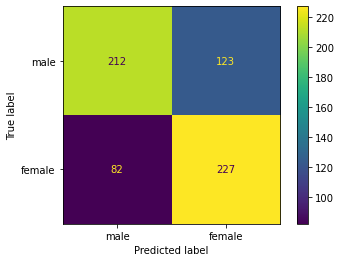

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(df_test['gender'], pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['male', 'female'])
disp.plot()
plt.grid(False)
plt.show()

### Save the optimal model to the drive

In [24]:
import pickle

model = '../models/NB_countVec.sav'
pickle.dump(opt_pipe, open(model, 'wb'))

# load the model with pickle.load(open(filename, 'rb'))